# 490 GeoSpatial Data Science Final: Whale Migration: Temperature Analysis
### Gage Doyle
#### 05/17/2024


In [3]:
import numpy as np
import rasterio
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import netCDF4
import h5netcdf
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [4]:
#Read in the dataset using xarray (xarray was recommened for climate rasters and '.nc')
xds = xr.open_dataset('C:/Users/gaged/Desktop/SDS 490 Data/Final Project/migration/Temperature/Data/NOAAGlobalTemp_v5.0.0_gridded_s188001_e202212_c20230108T133308.nc')

In [17]:
# define spatial extent
lat_min, lat_max = 4.606, 53.148
lon_min, lon_max = -165.662, 176.676

clipped_extent = xds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))


In [18]:
#define temporal extent
xds_2008 = clipped_extent.sel(time=slice('2008-01-01', '2008-12-31'))
xds_1999 = clipped_extent.sel(time=slice('1999-01-01', '1999-12-31'))


In [19]:
# Find Avg Sea-Surface temp Anomoly for each lat and lon in '08 and '99
avg_sst_2008 = xds_2008.mean(dim='time')
avg_sst_1999 = xds_1999.mean(dim='time')


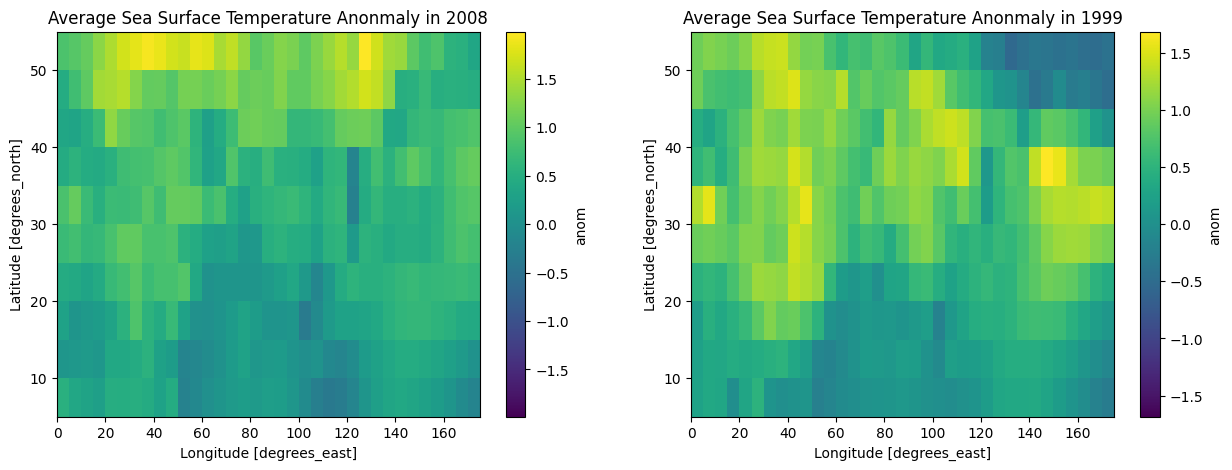

In [38]:
# Plot Avg SST Anomoly for each time window
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

avg_sst_2008['anom'].plot(ax=ax[0], cmap='viridis')
ax[0].set_title('Average Sea Surface Temperature Anonmaly in 2008')

avg_sst_1999['anom'].plot(ax=ax[1], cmap='viridis')
ax[1].set_title('Average Sea Surface Temperature Anonmaly in 1999')

plt.show()


In [ ]:
# Locate the coldest, hottest, and avg temp location in both the '08 &'99 extent

In [64]:
# Convert to pandas df 
df08= avg_sst_2008.to_dataframe()
df99= avg_sst_1999.to_dataframe()

In [59]:
# For '08 extent
hottest_08 = df08['anom'].max()
hottest_08_idx = df08['anom'].idxmax()
coldest_08 = df08['anom'].min()
coldest_08_idx = df08['anom'].idxmin()
mean_value_08 = df08['anom'].mean()

# For '99 extent
hottest_99 = df99['anom'].max()
hottest_99_idx = df99['anom'].idxmax()
coldest_99 = df99['anom'].min()
coldest_99_idx = df99['anom'].idxmin()
mean_value_99 = df99['anom'].mean()

# Function to format the index, removing the third parameter if present
def format_index(index):
    if len(index) == 3:
        return index[:2]  # Remove the third parameter
    return index

info_08 = (
    f"Hottest Anomaly in '08: {hottest_08} at location {format_index(hottest_08_idx)}\n\n"
    f"Coldest Anomaly in '08: {coldest_08} at location {format_index(coldest_08_idx)}\n\n"
    f"Mean Anomaly temperature in '08: {mean_value_08}\n\n"
)

info_99 = (
    f"Hottest Anomaly in '99: {hottest_99} at location {format_index(hottest_99_idx)}\n\n"
    f"Coldest Anomaly in '99: {coldest_99} at location {format_index(coldest_99_idx)}\n\n"
    f"Mean Anomaly temperature in '99: {mean_value_99}\n\n"
)

# Print the formatted information with separators
print(info_08)
print('-' * 40)
print(info_99)
print('-' * 40)


Hottest Anomaly in '08: 1.986241340637207 at location (52.5, 127.5)

Coldest Anomaly in '08: -0.3739990293979645 at location (7.5, 112.5)

Mean Anomaly temperature in '08: 0.6124664545059204


----------------------------------------
Hottest Anomaly in '99: 1.6838041543960571 at location (37.5, 147.5)

Coldest Anomaly in '99: -0.5450192093849182 at location (52.5, 132.5)

Mean Anomaly temperature in '99: 0.5974375605583191


----------------------------------------


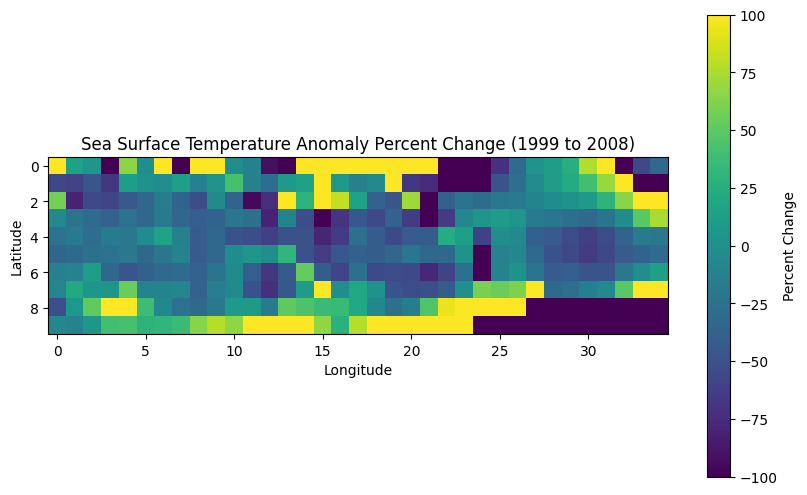

In [81]:
# Calculate the percent change in temperature anomaly
percent_change = ((avg_sst_2008 - avg_sst_1999) / avg_sst_1999) * 100

percent_change_squeezed = percent_change.squeeze()  
# Plot the percent change map
plt.figure(figsize=(10, 6))
plt.imshow(percent_change_squeezed['anom'], cmap='viridis', vmin=-100, vmax=100)
plt.colorbar(label='Percent Change')
plt.title('Sea Surface Temperature Anomaly Percent Change (1999 to 2008)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
